In [2]:
import pandas as pd
import datetime as dt
import animate
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade
import fov
import pickle
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pydarn
import rad_fov
import matplotlib.path
import matplotlib.patches 
import numpy as np
from scipy import interpolate

In [3]:
with open('radar_data.pickle', 'rb') as f:
    [bks, fhe, fhw, cve, cvw] = pickle.load(f)
df = pd.read_pickle('sliced.pkl')


In [32]:
print(bks[0:30])

[{'v': [[-7.3191070556640625, 5.131810188293457, 3.7485878467559814, 7.102036952972412, 1.0195133686065674, 0.14073505997657776, 9.163235664367676, -5.914886474609375, -3.680811882019043, -1.4812935590744019, 5.162458419799805], [-16.908084869384766, 11.995514869689941, -2.1463606357574463, 3.393105983734131, 1.7695823907852173, 4.355299472808838, 7.213866710662842, 5.060616493225098, -1.9791394472122192, 9.76418399810791, 16.68160057067871, -11.975881576538086, -276.2375793457031], [-0.32584908604621887, -1.8488999605178833, 2.969951629638672, -0.5529720187187195, 5.895452976226807, 8.129220962524414, 8.308717727661133, 1.1033642292022705, -7.515370845794678, -7.712530136108398], [-6.555980682373047, 6.259972095489502, -1.6690415143966675, 19.93393898010254, 16.399282455444336, 10.916889190673828, 11.223075866699219, 7.943638801574707, 6.617329120635986, 10.549018859863281, 14.043928146362305, -2.956400156021118, -21.25824546813965, -2.1836769580841064, -7.476614952087402, 17.60785675

In [4]:
def get_outline(radar, beam):
    hdw = pydarn.read_hdw_file(radar)
    rf = rad_fov.CalcFov(hdw=hdw, ngates=60)
    lons, lats = rf.lonFull, rf.latFull
    beam_lons = np.concatenate((lons[beam-1], np.flip(lons[beam])))
    beam_lats = np.concatenate((lats[beam-1], np.flip(lats[beam])))
    coords = np.vstack((beam_lons, beam_lats)).T
    path = matplotlib.path.Path(coords, closed=True)   
    
    #interpolation
    nrange = np.concatenate((np.arange(len(beam_lons) / 2), np.flip(np.arange(len(beam_lons) / 2))))
    #testing
    nrange_lats = np.concatenate((np.arange(len(beam_lats) / 2), np.flip(np.arange(len(beam_lats) / 2))))
    if (nrange != nrange_lats).all():
        raise UserWarning('different ranges calcuated from lat and lon verticies')
            
    
        
    interp = interpolate.LinearNDInterpolator((beam_lons, beam_lats), nrange)

    
    return path, interp



In [5]:
def single_plot(time, df):
    fig = plt.figure(figsize = (12, 7))
    part = df[df['datetime'] == time]
    if len(part) < 10000:
        part = df[df['datetime'] == time + dt.timedelta(seconds = 30)]
    
    ax = fig.add_subplot(1, 1, 1, projection="fovcarto",coords="geo", plot_date=time,map_projection=ccrs.Orthographic(central_longitude=-100, central_latitude=60))
    ax.set_extent([-130, -70, 30, 65])
    ax.set_title(time.strftime('%H:%M UT'), size=20)
    mesh = ax.scatter(part.glon, part.gdlat, c=part['30min_detrend'], transform=ccrs.PlateCarree(), vmin=-1, vmax=1, cmap='plasma', s=8, zorder=0)
    pos = ax.get_position()
    ax.grid_on()
    cbar = plt.colorbar(mesh, fraction=0.04, pad=0.04)
    cbar.set_label('TECu')
    ax.coastlines()
    ax.add_dn_terminator()

    return ax

In [6]:
start = dt.datetime(2017, 9, 7, 23)
end = dt.datetime(2017, 9, 8, 3)
radar = 'cve'
beam = 18

C:\Users\ijayk\Anaconda3\envs\env\lib\site-packages\cartopy\mpl\gridliner.py: 307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
C:\Users\ijayk\Anaconda3\envs\env\lib\site-packages\cartopy\mpl\gridliner.py: 343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.


_HdwInfo(stid=204, abbrev='fhw', geographic=_Coord(lat=38.859, lon=-99.389, alt=675.1), boresight=-25.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=0.0, tdiff=0.0, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-80.0, z=0.0), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=22)
_HdwInfo(stid=205, abbrev='fhe', geographic=_Coord(lat=38.859, lon=-99.389, alt=673.6), boresight=45.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=0.0, tdiff=0.0, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-80.0, z=0.0), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=22)


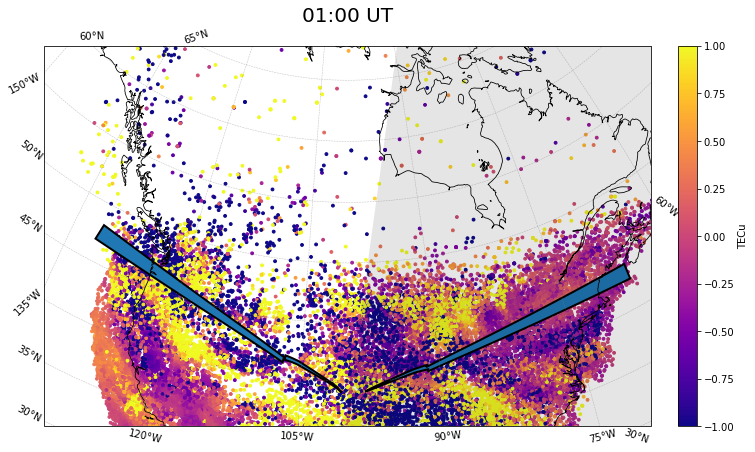

In [7]:
ax = single_plot(dt.datetime(2017, 9, 8, 1), df)
"""
radar = 'cvw'
beam = 12
path, interp = get_outline(radar, beam)
patch = matplotlib.patches.PathPatch(path, edgecolor='k', lw=2, transform=ccrs.PlateCarree())
ax.add_patch(patch)



radar = 'cve'
beam = 18
path, interp = get_outline(radar, beam)
patch = matplotlib.patches.PathPatch(path, edgecolor='k', lw=2, transform=ccrs.PlateCarree())
ax.add_patch(patch)
"""
radar = 'fhw'
beam = 1
path, interp = get_outline(radar, beam)
patch = matplotlib.patches.PathPatch(path, edgecolor='k', lw=2, transform=ccrs.PlateCarree())
ax.add_patch(patch)

radar = 'fhe'
beam = 19
path, interp = get_outline(radar, beam)
patch = matplotlib.patches.PathPatch(path, edgecolor='k', lw=2, transform=ccrs.PlateCarree())
ax.add_patch(patch)



part = df[df['datetime'] == dt.datetime(2017, 9, 8, 1)]
df['contained'] = path.contains_points(np.vstack((df.glon, df.gdlat)).T)

_HdwInfo(stid=207, abbrev='cve', geographic=_Coord(lat=43.271, lon=-120.358, alt=1313.535), boresight=54.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=10.0, tdiff=-0.398, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-80.0, z=0.0), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=24)


<ipython-input-8-c800512d39c3>: 10: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

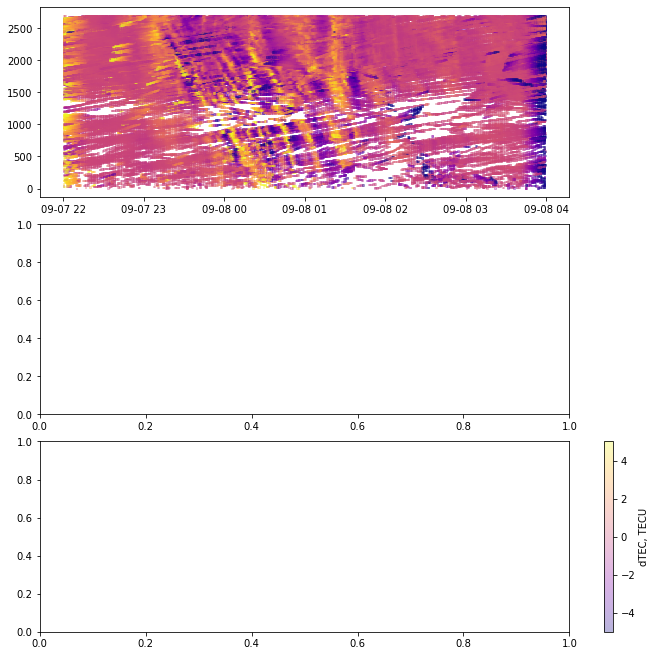

In [8]:
radar = 'cve' 
beam = 18 
path, interp = get_outline(radar, beam)
df['contained'] = path.contains_points(np.vstack((df.glon, df.gdlat)).T) 
part = df.where(df['contained'] == 1).dropna()

part['nrange'] = 45*interp(part.glon, part.gdlat) 
fig, axs = plt.subplots(3, 1, constrained_layout=True, figsize=(9, 9)) 
a1 = pts = axs[0].scatter(part.datetime, part.nrange, c=part['30min_detrend'], vmin=-5, vmax=5, marker='s', alpha=.3, s=2, cmap='plasma') 
cbar = fig.colorbar(a1) 
cbar.set_alpha(1)
cbar.set_label('dTEC, TECU') 
matplotlib.rcParams['figure.dpi'] = 300 
locator = mdates.AutoDateLocator(minticks=3, maxticks=7) 
formatter = mdates.ConciseDateFormatter(locator) 
axs.xaxis.set_major_locator(locator) 
axs.xaxis.set_major_formatter(formatter) 
axs.set_xlim([start, end]) 
axs.set_ylim([0, 2700]) 
plt.title('TEC within beam #' + str(beam) + ' of ' + radar) 
axs.set_ylabel("Slant Range, km")

a2 = axs[1].scatter(rad_df.time, rad_df.slist, c = rad_df.p_l, vmin = 0, vmax=40, cmap='jet', marker = 's', s=3, alpha = 0.3)
cbar = fig.colorbar(a2) 
cbar.alpha = 1
cbar.set_label('Radar Power, dB')


In [35]:
print(rad_df.head())

     bmnum  gflg   noise.sky  npts  nrang        p_l  scan  slist    tfreq  \
199   18.0   1.0  141.699997  16.0  100.0  24.356434   0.0    2.0  14727.0   
200   18.0   1.0  141.699997  16.0  100.0  14.973265   0.0    3.0  14727.0   
201   18.0   1.0  141.699997  16.0  100.0  30.203745   0.0   41.0  14727.0   
202   18.0   1.0  141.699997  16.0  100.0  29.708254   0.0   42.0  14727.0   
203   18.0   1.0  141.699997  16.0  100.0  25.964193   0.0   43.0  14727.0   

                          time         v        w_l  
199 2017-09-07 23:00:53.693877 -4.365675  11.700307  
200 2017-09-07 23:00:53.693877 -7.952096 -10.490098  
201 2017-09-07 23:00:53.693877  2.102349  -0.784830  
202 2017-09-07 23:00:53.693877  2.591173  -2.590165  
203 2017-09-07 23:00:53.693877  4.694778   1.346980  


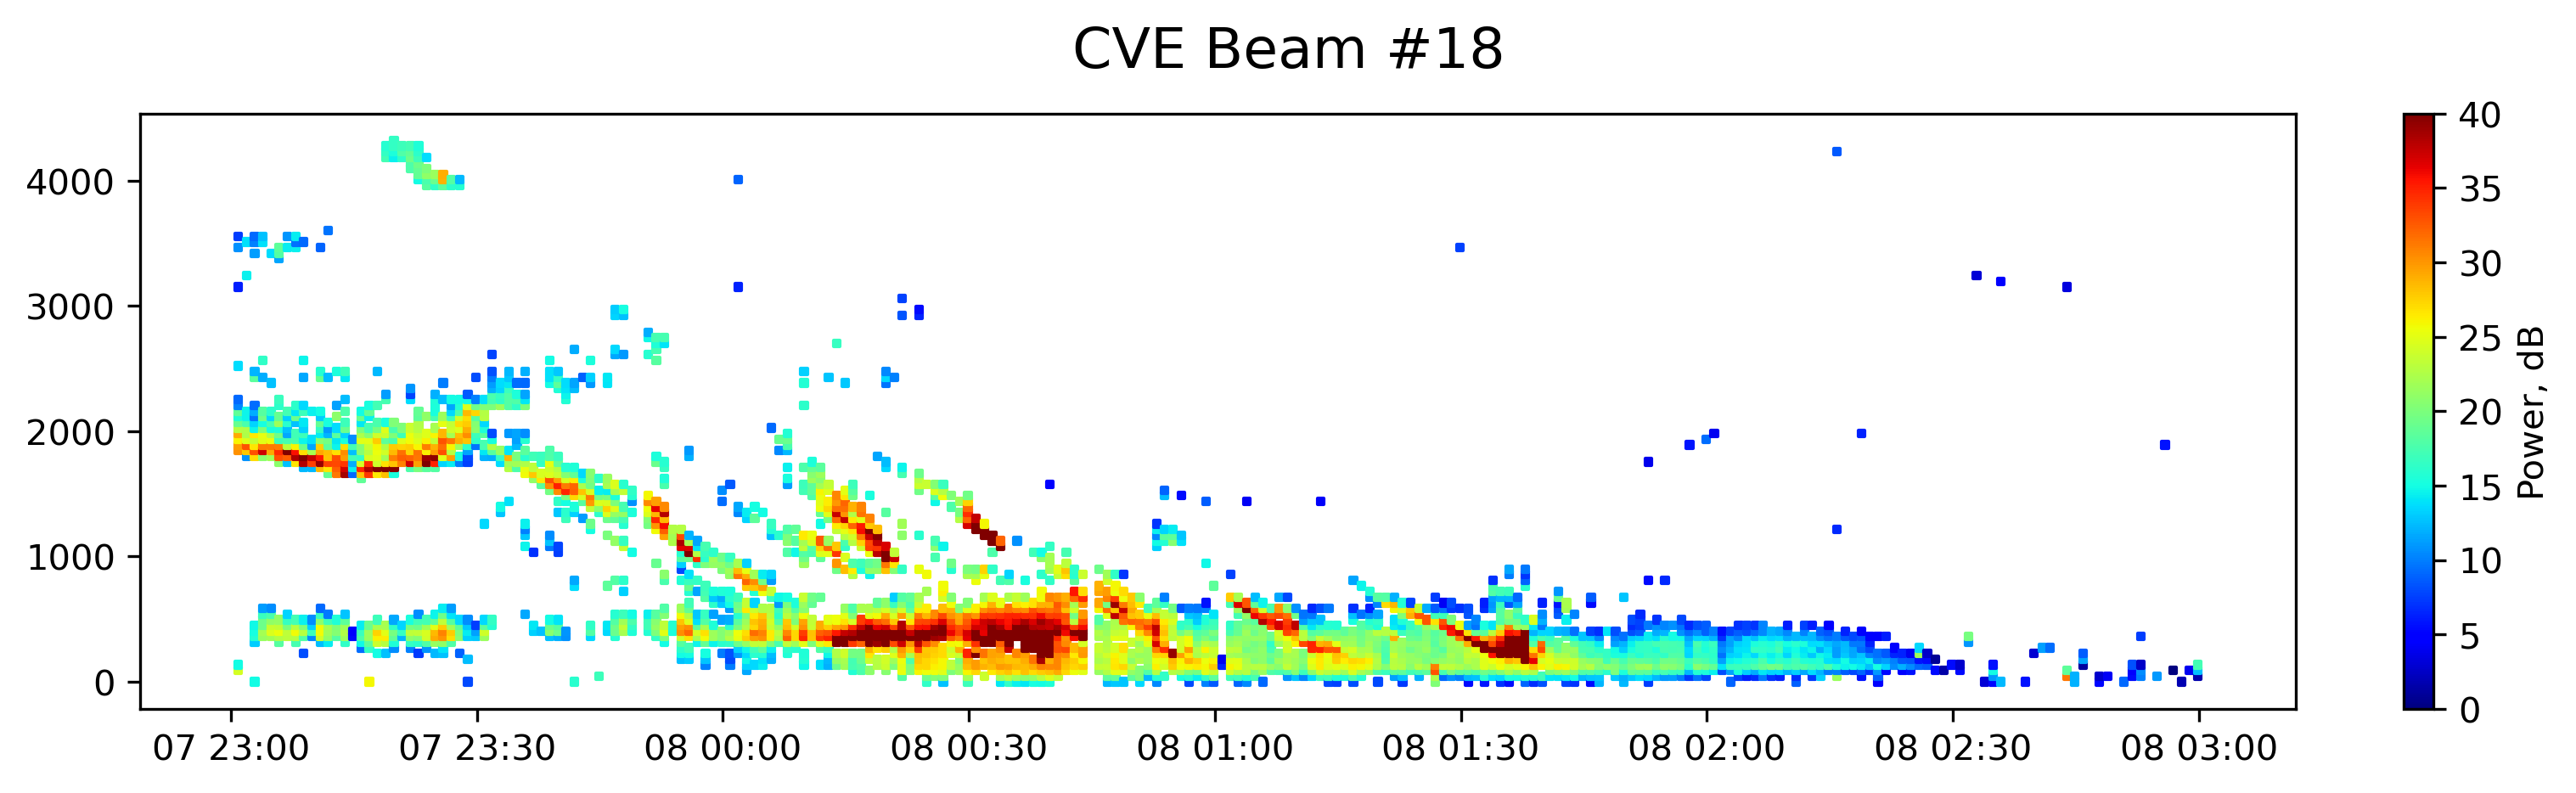

In [54]:
rad_df = pd.read_pickle('radar_2017-09-07cve18.pkl')
rad_df.slist = rad_df.slist * 45
def powerplot(rad_df, maxrange=60):
    fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(10, 3))
    beam_num = int(rad_df.bmnum.unique()[0])
    fig.suptitle(radar.upper() + ' Beam #' + str(beam_num), fontsize=16)
    plt.scatter(rad_df.time, rad_df.slist, c = rad_df.p_l, vmin = 0, vmax=40, cmap='jet', marker = 's', s=3)
    cbar = plt.colorbar()
    cbar.set_label('Power, dB')

powerplot(rad_df)

In [1]:
def vel_ts(part, startrange, endrange, start, end):
    part = part.where(startrange < part.nrange)
    part = part.where(part.nrange < endrange).dropna()
    fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 2.7))
    axs.scatter(part.datetime, part['30min_detrend'], s=.25, marker='s', c='k')
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    axs.xaxis.set_major_locator(locator)
    axs.xaxis.set_major_formatter(formatter)

    plt.title('Detrended TEC between ' + str(startrange) + ' and ' + str(endrange) +'km')
    axs.set_ylim([-5, 5])
    axs.set_xlim([start, end])
    grouped = part.set_index('datetime').groupby(pd.Grouper(freq='s')).mean().dropna()
    axs.plot(grouped.index, grouped['30min_detrend'], c='r')

219271


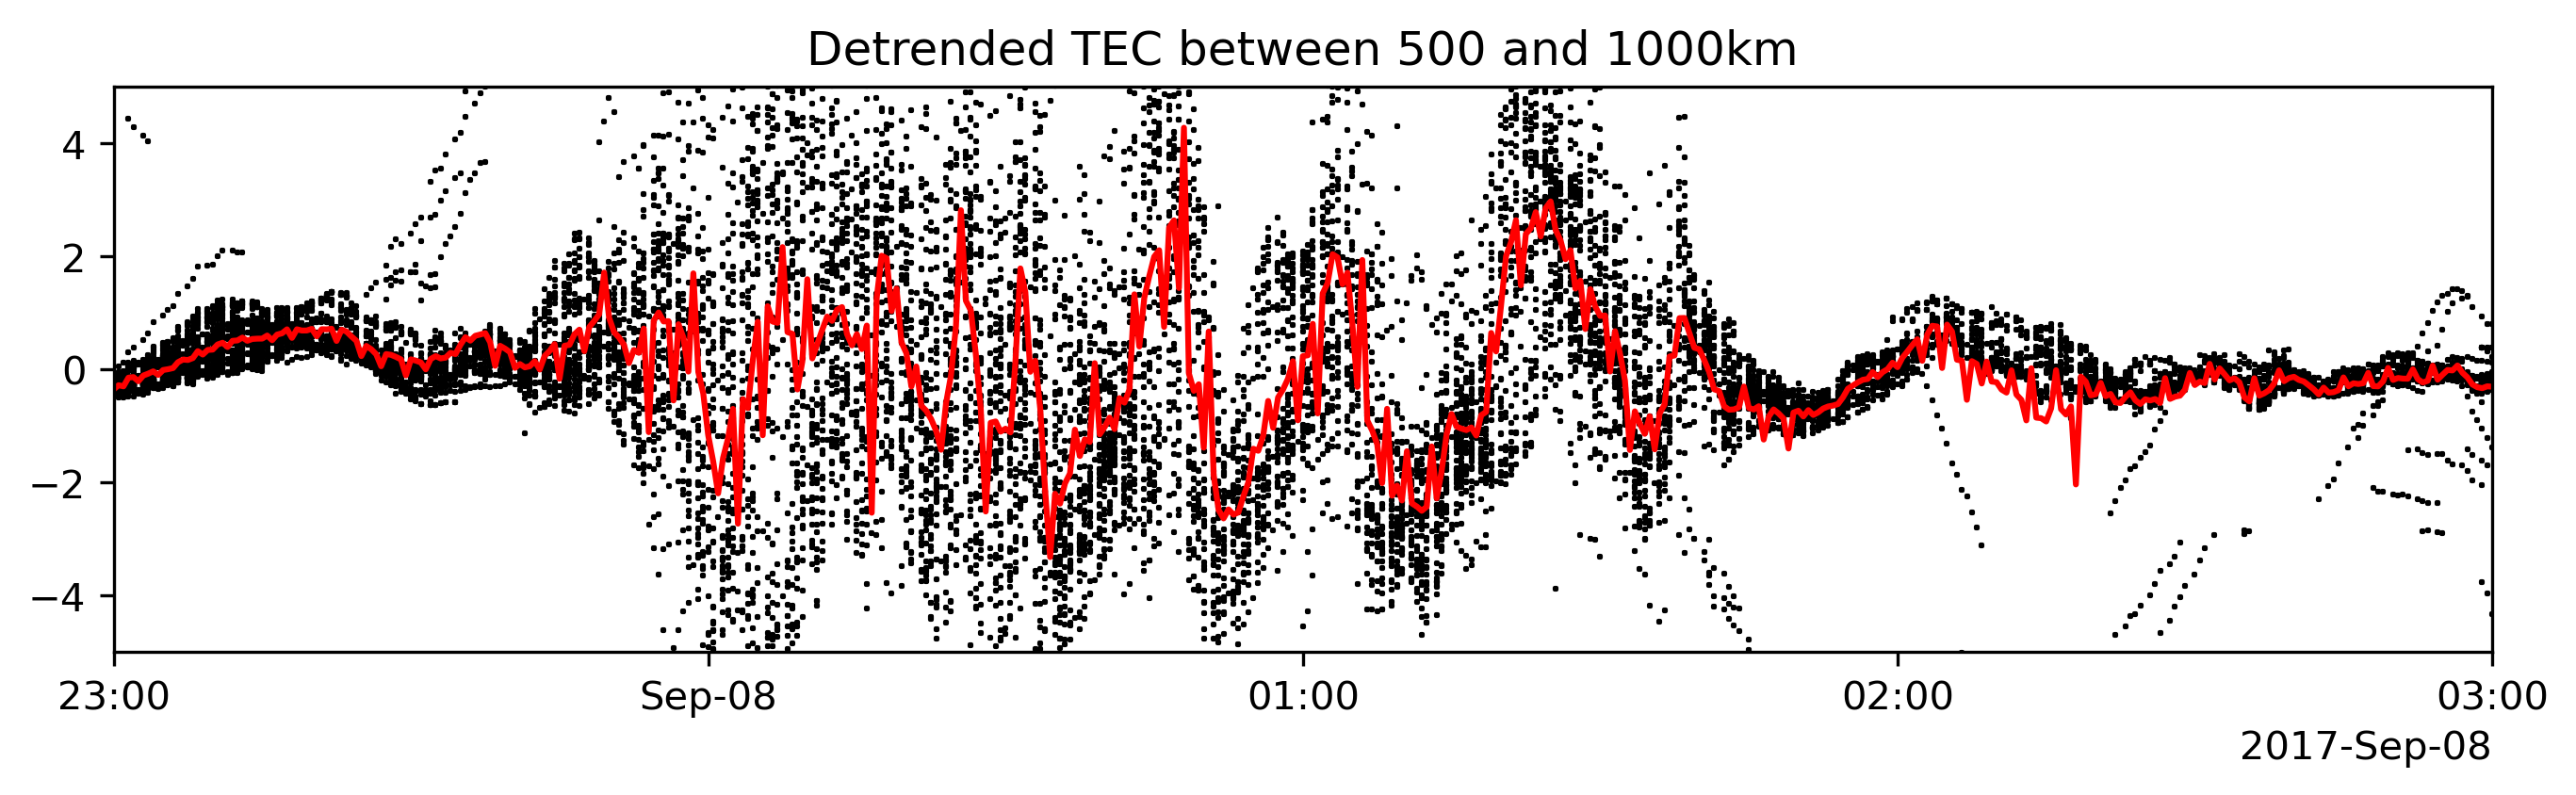

In [94]:
vel_ts(part, 500, 1000, start, end)
print(len(part))

In [ ]:
part = df.where(df['contained'] == 1).dropna()

part['nrange'] = 45*interp(part.glon, part.gdlat)
fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 2.7))
a1 = pts = axs.scatter(part.datetime, part.nrange, c=part['30min_detrend'], vmin=-.5, vmax=.5, marker='s', alpha=.5, s=2, cmap='plasma')
cbar = fig.colorbar(a1)
cbar.set_label('dTEC, TECU')
matplotlib.rcParams['figure.dpi'] = 300
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
axs.xaxis.set_major_locator(locator)
axs.xaxis.set_major_formatter(formatter)
axs.set_xlim([start, end])
axs.set_ylim([0, 2700])
plt.title('TEC within beam #' + str(beam) + ' of ' + radar)
axs.set_ylabel("Slant Range, km")

In [ ]:
print(fhw[0:100])

In [ ]:

def plot_still(time, df, frame_code, start):
    import warnings
    warnings.filterwarnings('ignore')
    time = dt.datetime(2017, 9, 8, 1,30, 30)
    index = int((time - start).seconds / 60)
    fig = plt.figure(figsize = (25, 14))



    ax = fig.add_subplot(2, 2, 3, projection="fovcarto",coords="geo", plot_date=time,map_projection=ccrs.Orthographic(central_longitude=-100, central_latitude=60))
    ax.set_extent([-130, -70, 20, 60])
    ax.set_title('Fort Hays East/West', size=20)
    ax.grid_on()
    ax.coastlines()
    ax.add_dn_terminator()

    ax.rad='fhe'
    ax.overlay_radar()
    ax.overlay_fov()
    ax.overlay_radar_data(fhe[index], p_max=500, p_min=-500, add_colorbar=False, cmap='RdBu')

    ax.rad='fhw'
    ax.overlay_radar()
    ax.overlay_fov()
    ax.overlay_radar_data(fhw[index], p_max=500, p_min=-500, add_colorbar=False, cmap='RdBu')

    cmap = matplotlib.cm.RdBu
    norm = matplotlib.colors.Normalize(vmin=-500, vmax=500)
    cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,fraction=0.04, pad=0.04) 
    cbar.set_label('Velocity, m/s')

    ax = fig.add_subplot(2, 2, 4, projection="fovcarto",coords="geo", plot_date=time,map_projection=ccrs.Orthographic(central_longitude=-100, central_latitude=60))
    ax.set_extent([-130, -70, 20, 60])
    ax.set_title('Christmas Valley East/West', size=20)
    ax.grid_on()
    ax.coastlines()
    ax.add_dn_terminator()

    ax.rad='cve'
    ax.overlay_fov()
    ax.overlay_radar_data(cve[index], p_max=500, p_min=-500, add_colorbar=False, cmap ='RdBu')

    ax.rad='cvw'
    ax.overlay_fov()
    ax.overlay_radar()
    ax.overlay_radar_data(cvw[index], p_max=500, p_min=-500, add_colorbar=False, cmap ='RdBu')



    cmap = matplotlib.cm.RdBu
    norm = matplotlib.colors.Normalize(vmin=-500, vmax=500)
    cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,fraction=0.04, pad=0.04) 
    cbar.set_label('Velocity, m/s')
    
    #get tec based on time, use next 30 second time if not enough data 
    part = df[df['datetime'] == time]
    if len(part) < 10000:
        part = df[df['datetime'] == time + dt.timedelta(seconds = 30)]
    
    ax = fig.add_subplot(2, 2, 2, projection="fovcarto",coords="geo", plot_date=time,map_projection=ccrs.Orthographic(central_longitude=-100, central_latitude=60))
    ax.set_extent([-130, -70, 20, 60])
    ax.set_title('Raw GNSS TEC', size=20)
    mesh = ax.scatter(part.glon, part.gdlat, c=part['tec'], transform=ccrs.PlateCarree(), vmin=0, vmax=25, cmap='plasma', s=8, zorder=0, alpha=0.8)
    pos = ax.get_position()
    ax.grid_on()
    cbar = plt.colorbar(mesh, fraction=0.04, pad=0.04)
    cbar.set_label('TECu')
    ax.coastlines()
    ax.add_dn_terminator()

    ax = fig.add_subplot(2, 2, 1, projection="fovcarto",coords="geo", plot_date=time,map_projection=ccrs.Orthographic(central_longitude=-100, central_latitude=60))
    ax.set_extent([-130, -70, 20, 60])
    ax.set_title('30 min Detrended GNSS TEC', size=20)
    mesh = ax.scatter(part.glon, part.gdlat, c=part['30min_detrend'], transform=ccrs.PlateCarree(), vmin=-0.5, vmax=.5, cmap='winter', s=8, zorder=0, alpha=0.8)
    pos = ax.get_position()
    ax.grid_on()
    cbar = plt.colorbar(mesh, fraction=0.04, pad=0.04)
    cbar.set_label('TECu')
    ax.coastlines()
    ax.add_dn_terminator()

    fig.suptitle(time.strftime('%H:%M UT'), size=50)
    plt.show()

In [ ]:

tecmap = plt.figure(figsize=(16, 10))
time = dt.datetime(2017, 9, 8, 1, 1)
ax = plt.axes(projection = ccrs.Orthographic(central_longitude=-100, central_latitude=60))
ax.coastlines(color='black', zorder=1)
ax.gridlines()
ax.set_extent([-130, -70, 20, 60])
ax.add_feature(Nightshade(time, alpha=0.15))
   
part = df[df['datetime'] == time]

        
ax.set_title(str(time), size=30)    
mesh = ax.scatter(part.glon, part.gdlat, c=part.tec, transform=ccrs.PlateCarree(), vmin=0, vmax=25, cmap='plasma', s=8)
cbar = plt.colorbar(mesh, fraction=0.046, pad=0.04)
cbar.set_label('TECu')

plt.show()

In [ ]:
time = dt.datetime(2017, 9, 7, 23)
while time < dt.datetime(2017, 9, 8, 3):
    print(time, len(sliced[sliced['datetime'] == time]))
    time = time + dt.timedelta(seconds = 30)

In [ ]:
print(df.head())